$\textbf{In this exercise we shall consider the following problem:} \\ 
q(x)=f(x_1,x_2,…,x_n)=\sum_{i=1}^n ((x_i-1)^2+(x_1-x_i^2)^2)$


$\text{1. Implement the required modules to compute the objective function value, gradient and Hessian for q(x)}$

In [1]:
import numpy as np
from timeit import default_timer as timer

$\text{ Use BFGS method to solve the problem minx∈Rn q(x). Use backtracking line search wit} h α_0 = 0.9, ρ = 0.5, γ =
0. \text{ in the implementation of BFGS method. Take the starting point to be }  \\ x^0=(0,0,0,....0)$

In [ ]:
def evalf(x,n):
  assert type(x) is np.ndarray and len(x)==n
  return sum((x[i]-1)**2+(x[0]-x[i]**2)**2 for i in range(n))

In [ ]:
def evalg(x,n):
  assert type(x) is np.ndarray and len(x)==n
  grad_list=[]
  grad_list.append(2*(x[0]-1)+2*(x[0]-x[0]**2)*(1-2*x[0])+sum(2*(x[0]-x[i]**2) for i in range(1,n)))
  for i in range(1,n):
    grad_list.append(2*(x[i]-1)-4*x[i]*(x[0]-x[i]**2))
  return np.array(grad_list).reshape(n,1) 

In [ ]:
def compute_steplength_backtracking(n,x, gradf, direction, alpha_start, rho, gamma):
  assert type(x) is np.ndarray and len(x) == n 
  assert type(gradf) is np.ndarray and len(gradf) == n  
  assert type(direction) is np.ndarray and len(gradf) == n
  assert type(alpha_start) is float and alpha_start>=0. 
  assert type(rho) is float and rho>=0.
  assert type(gamma) is float and gamma>=0. 
  
  alpha = alpha_start
  while evalf(x+alpha*direction,n)>evalf(x,n)+gamma*alpha*np.matmul(gradf.T,direction):
    alpha=rho*alpha

  return alpha

In [ ]:
BACKTRACKING_LINE_SEARCH = 1
CONSTANT_STEP_LENGTH=2
EXACT_LINE_SEARCH=3

In [ ]:
def BFGS_method(n,start_x,tol,*args):
  assert type(start_x) is np.ndarray  and len(start_x) == n
  assert type(tol) is float and tol>=0 

  x=start_x
  g_x=evalg(x,n)
  B_k=np.identity(n)/4
  alpha_start=args[0]
  rho = args[1]
  gamma = args[2]

  k=0
  while (np.linalg.norm(g_x)>tol):
    p_k=-np.matmul(B_k,g_x)
    step_length=compute_steplength_backtracking(n,x, g_x, p_k, alpha_start, rho, gamma)

    x_initial=x
    x=x+np.multiply(step_length,p_k)

    s_k=x-x_initial
    y_k=evalg(x,n)-evalg(x_initial,n)
    u_k= 1/np.matmul(y_k.transpose(),s_k)

    B_1=np.eye(n)-u_k*np.matmul(s_k,y_k.transpose())
    B_2=np.eye(n)-u_k*np.matmul(y_k,s_k.transpose())

    B_k=np.matmul(np.matmul(B_1,B_k),B_2)+u_k*np.matmul(s_k,s_k.transpose())
    k=k+1
    g_x=evalg(x,n)
    #if k%1000==0:
      #print('iterations till now:',k)

  return x,evalf(x,n),k


$\large \textbf{Question 3:}$3 [R] Take n ∈ {1000, 2500, 5000, 7500, 10000}, find minimizer of the objective function in each case and compute
the time taken by the BFGS method with backtracking line search. Tabulate the time taken by BFGS method
for each n.

In [4]:
n_list=[1000,2500,5000,7500,10000]

In [ ]:
n_list=[1000,2500,5000,7500,10000]
alpha_start=0.9
rho=0.5
gamma=0.5
iteration_list=[]
time_taken_list=[]
for n in n_list:
  start_time=timer()
  x_start=np.array([0 for i in range(n)]).reshape((n,1))
  minimizer,minimum_val,iter=BFGS_method(n,x_start,1e-3,alpha_start,rho,gamma)
  end_time=timer()
  iteration_list.append(iter)
  time_taken_list.append(end_time-start_time)

  print('when n is :',n)
  print('minimim_value of function is:',minimum_val)
  print('number of iterations taken:',iter)
  print('time taken to solve:',end_time-start_time)
  print('minimizer is :',minimizer)
  
  print('\n********************************************************')


when n is : 1000
minimim_value of function is: [3.06938807e-11]
number of iterations taken: 11
time taken to solve: 3.4285678840005858
minimizer is : [[0.99999964]
 [0.99999988]
 [0.99999988]
 [0.99999988]
 [0.99999988]
 [0.99999988]
 [0.99999988]
 [0.99999988]
 [0.99999988]
 [0.99999988]
 [0.99999988]
 [0.99999988]
 [0.99999988]
 [0.99999988]
 [0.99999988]
 [0.99999988]
 [0.99999988]
 [0.99999988]
 [0.99999988]
 [0.99999988]
 [0.99999988]
 [0.99999988]
 [0.99999988]
 [0.99999988]
 [0.99999988]
 [0.99999988]
 [0.99999988]
 [0.99999988]
 [0.99999988]
 [0.99999988]
 [0.99999988]
 [0.99999988]
 [0.99999988]
 [0.99999988]
 [0.99999988]
 [0.99999988]
 [0.99999988]
 [0.99999988]
 [0.99999988]
 [0.99999988]
 [0.99999988]
 [0.99999988]
 [0.99999988]
 [0.99999988]
 [0.99999988]
 [0.99999988]
 [0.99999988]
 [0.99999988]
 [0.99999988]
 [0.99999988]
 [0.99999988]
 [0.99999988]
 [0.99999988]
 [0.99999988]
 [0.99999988]
 [0.99999988]
 [0.99999988]
 [0.99999988]
 [0.99999988]
 [0.99999988]
 [0.999999

$\text{As can see that our table of time taken by bfgs is as following: }$

In [ ]:
from tabulate import tabulate

In [ ]:
table = [["n", " bfgs timing "]]
for i in  range(len(time_taken_list)):
    table.append([n_list[i] , time_taken_list[i] ])    
print(tabulate(table, headers = 'firstrow',tablefmt="grid"))

+-------+-----------------+
|     n |    bfgs timing  |
+=======+=================+
|  1000 |         3.42857 |
+-------+-----------------+
|  2500 |        34.7538  |
+-------+-----------------+
|  5000 |       199.974   |
+-------+-----------------+
|  7500 |       715.442   |
+-------+-----------------+
| 10000 |      1524.92    |
+-------+-----------------+


In [2]:
time_taken_bfgs=[3.42857,34.7538,199.974,715.442,1524.92]

$\large \text{Question 4:}$ 5. [R] Take n ∈ {1000, 2500, 5000, 7500, 10000}, find minimizer of the objective function in each case and compute
the time taken by the Newton’s method with backtracking line search. Tabulate the time taken by Newton’s
method for each n.

In [ ]:
def evalh(x,n):
  assert type(x) is np.ndarray and len(x) == n 
  hessn = np.zeros((n,n))
  hessn[0][0] = 2 -4*(x[0] - x[0]**2) + 2*(1- 2*x[0])**2
  if n>=2:
    for i in range(1,n):
      hessn[0][0] = hessn[0][0] + 2
      hessn[0][i] = -4*x[i]
  
  for i in range(1,n):
    hessn[i][i] = 2 - 4*(x[0] - x[i]**2) + 8*(x[i]**2)
    hessn[i][0] = hessn[0][i] 

  return hessn

In [ ]:
def newton_method(n,start_x,tol,*args):

  x=start_x
  gradf=evalg(x,n)
  hess=evalh(x,n)

  alpha_start=args[0]
  rho = args[1]
  gamma = args[2]
  p_k=-np.matmul(np.linalg.inv(hess),gradf)
  k=0
  while np.linalg.norm(gradf)>tol:
    p_k=-np.matmul(np.linalg.inv(hess),gradf)
    step_length=compute_steplength_backtracking(n,x, gradf, p_k, alpha_start, rho, gamma)
    x=np.add(x,np.multiply(step_length,p_k))
    k=k+1
    gradf=evalg(x,n)
    hess=evalh(x,n)
  return x, evalf(x,n),k    



In [ ]:
n_list=[1000,2500,5000,7500,10000]
alpha_start=0.9
rho=0.5
gamma=0.5
iteration_list_newton=[]
time_taken_list_newton=[]
print('Using Newtons method \n ***********************************')
for n in n_list:
  
  start_time=timer()
  x_start=np.array([0 for i in range(n)]).reshape((n,1))
  minimizer,minimum_val,iter=newton_method(n,x_start,1e-3,alpha_start,rho,gamma)
  end_time=timer()
  iteration_list_newton.append(iter)
  time_taken_list_newton.append(end_time-start_time)

  print('when n is :',n)
  print('minimim_value of function is:',minimum_val)
  print('number of iterations taken:',iter)
  print('time taken to solve:',end_time-start_time)
  print('minimizer is :',minimizer)
  
  print('\n********************************************************')

Using Newtons method 
 ***********************************
when n is : 1000
minimim_value of function is: [1.47390137e-11]
number of iterations taken: 9
time taken to solve: 2.993083380999451
minimizer is : [[0.99999973]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.99999

$\text{Time taken by newton method to solve :}$

In [ ]:
table = [["n", " newton method timing "]]
for i in  range(len(time_taken_list_newton)):
    table.append([n_list[i] , time_taken_list_newton[i] ])    
print(tabulate(table, headers = 'firstrow',tablefmt="grid"))

+-------+--------------------------+
|     n |    newton method timing  |
+=======+==========================+
|  1000 |                  2.99308 |
+-------+--------------------------+
|  2500 |                 19.9596  |
+-------+--------------------------+
|  5000 |                133.638   |
+-------+--------------------------+
|  7500 |                412.435   |
+-------+--------------------------+
| 10000 |               1041.65    |
+-------+--------------------------+


In [3]:
time_taken_newton=[2.99308,19.9596,133.638,412.435,1041.65]

$\large \text{Question 5:} $ [R] Compare the time taken by BFGS method with backtracking line search against the time taken by Newton’s
method with backtracking line search for each value of n. Plot the time taken by both methods vs n using
different colors. Comment on your observations.

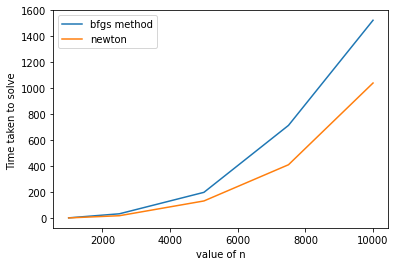

In [5]:
import matplotlib.pyplot as plt
plt.plot(n_list,time_taken_bfgs,label='bfgs method')
plt.plot(n_list,time_taken_newton,label='newton')
plt.xlabel('value of n')
plt.ylabel('Time taken to solve ')
plt.legend()
plt.show()

$\large \textbf{Observations:} \\ \text{As we can see that newton's method takes low time to reach the optimal condition and also we can see that as soon as value of n }  \\ \text{ increases the time difference between bfgs method and newton's method to reach optimal condition. }$